# Class Imbalance

## Author - Rodolfo Lerma

# Problem

Is it possible to distinguishe between bad and good connections based on given features?

# Abstract:

You are involved in a project where you are tasked to build a machine learning algorithm that distinguishes between "bad'' connections (called intrusions or attacks) and "good'' (normal) connections. Note that the number of normal connections is greater than that of bad ones. 

The analysis is is divided the following way:

### Data exploration:
- **Exploration of the 39 numerical variables**
- **Exploration of the 3 categorical variables**

### Analysis:
- **Input Data**
    - *Normalized Variables*
    - *One-hot encode*
- **Split Data Set**
- **Train & Test Model**
- **Evaluate Model Performance**
- **Class Imbalance**

### Summary/conclusions:

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Data exploration

In [2]:
#Load File
filename = 'Intrusion_Detection.csv'
intrusion = pd.read_csv(filename)

In [3]:
intrusion.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [4]:
#Check the shape of the data array
intrusion.shape

(97308, 42)

**Summary:**
- The data set contains 97,308 rows
- The data set has 42 Variables (columns)
- 3 variables are categorical (objects), and the rest variables are either int64 or float64.

In [5]:
intrusion.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
count,97308.000000,9.730800e+04,9.730800e+04,97308.000000,97308.0,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,...,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000
mean,216.618798,1.157123e+03,3.385562e+03,0.000010,0.0,0.000031,0.045135,0.000185,0.719047,0.028990,...,202.006084,0.845039,0.056462,0.134121,0.024139,0.002121,0.001068,0.057706,0.055819,0.000308
std,1359.006741,3.422086e+04,3.757305e+04,0.003206,0.0,0.009617,0.859471,0.020775,0.449467,4.046376,...,86.965239,0.305171,0.180003,0.280997,0.049664,0.029417,0.015721,0.224963,0.218861,0.017556
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.470000e+02,1.360000e+02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,170.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.310000e+02,4.210000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.130000e+02,2.124000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.010000,0.070000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.194619e+06,5.134218e+06,1.000000,0.0,3.000000,30.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
intrusion.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [7]:
intrusion = intrusion.dropna()
intrusion.shape

(97308, 42)

As it is possible to see from the previous code, there are no missing values in the data set.

## Exploration of the 39 numerical variables

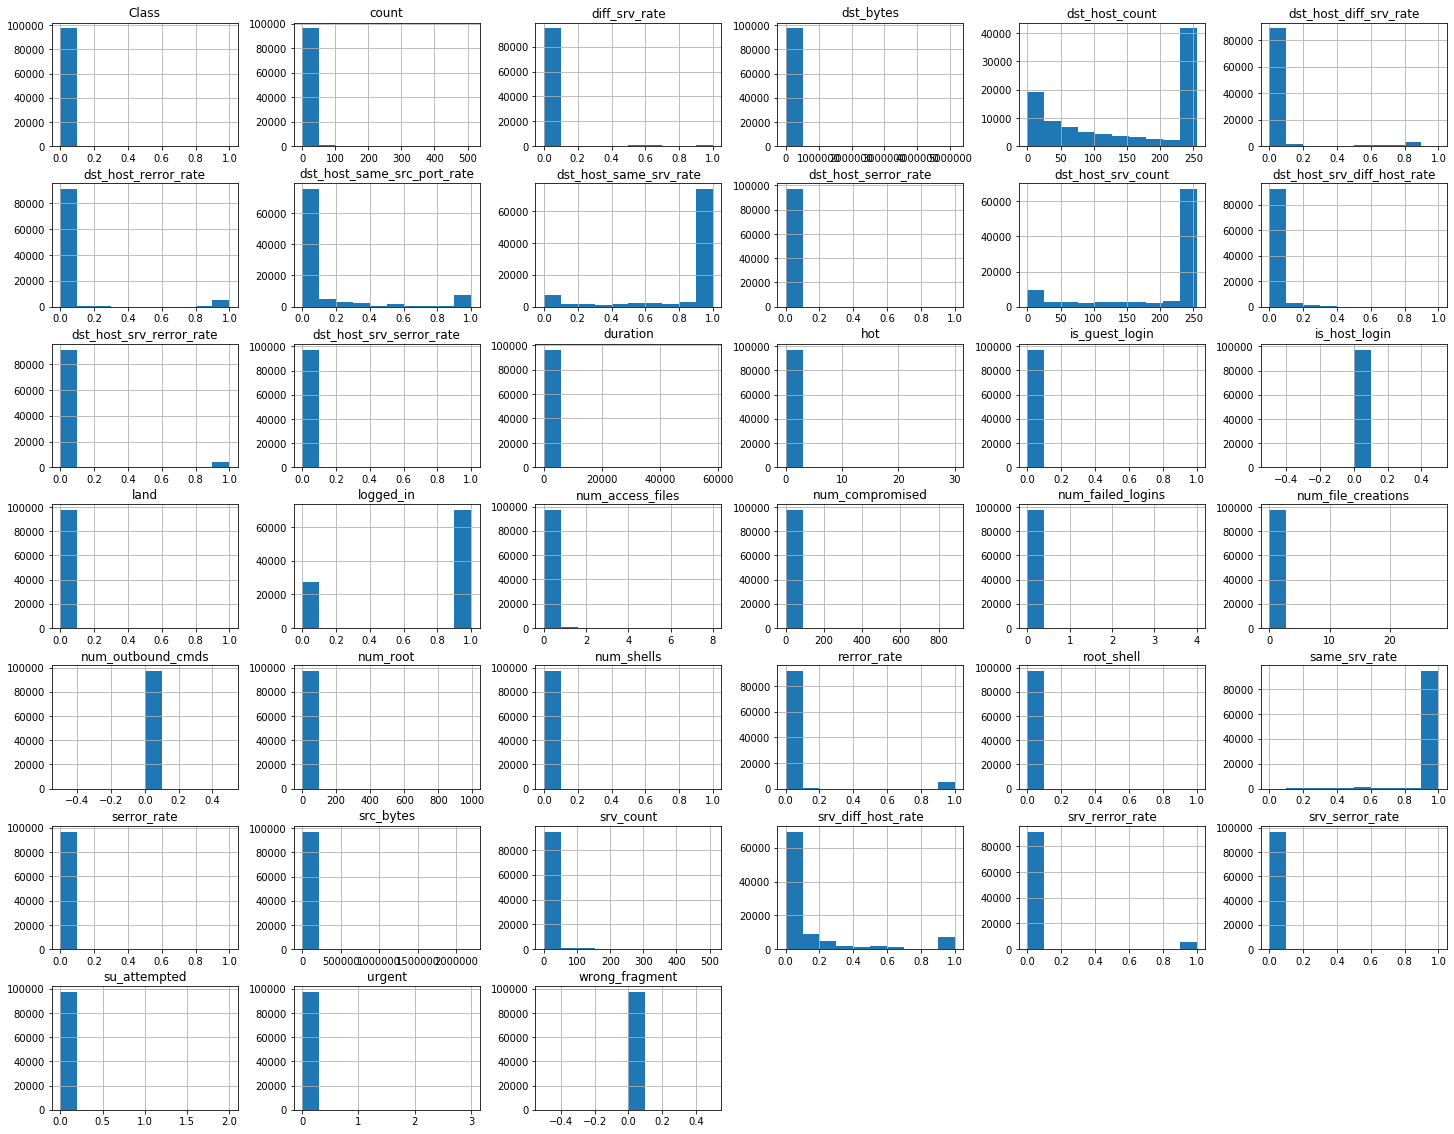

In [8]:
intrusion.hist(figsize = (25,20))
plt.show()

It is possible to see that some of the variables only have 1 value, which does not provide value for the ML model that we are going to develop. For that reason those variables will be dropped.

## Exploration of the 3 categorical variables

In [9]:
intrusion.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [10]:
intrusion.service.unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'pop_3', 'ftp_data', 'ssh',
       'domain', 'private', 'time', 'shell', 'IRC', 'urh_i', 'X11',
       'urp_i', 'tftp_u', 'tim_i', 'red_i'], dtype=object)

In [11]:
intrusion.flag.unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'RSTO', 'S3', 'OTH', 'RSTR'],
      dtype=object)

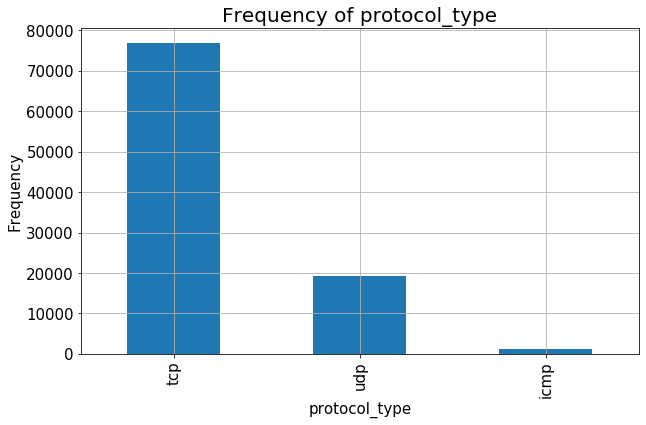

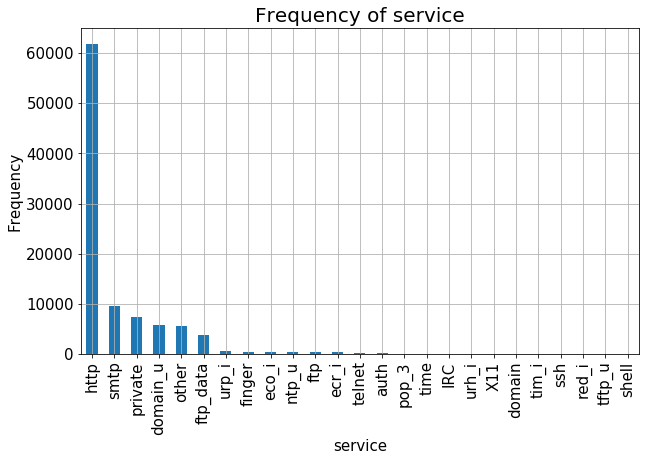

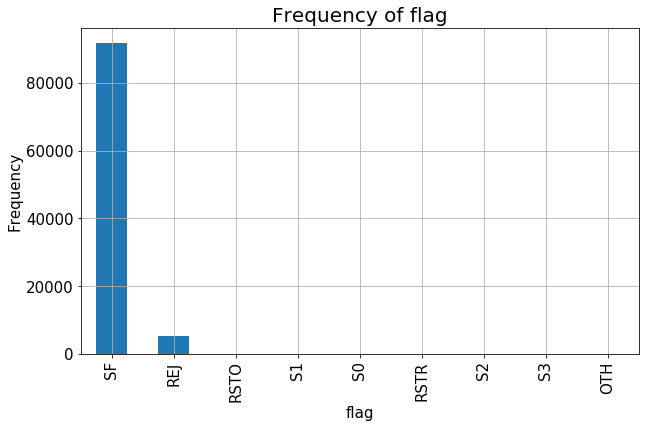

In [12]:
categorical = ['protocol_type','service','flag']
for i in categorical:
    intrusion.loc[:,i].value_counts().plot(kind='bar',figsize = (10,6))
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.title('Frequency of ' + i, fontsize = 20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    plt.grid(True)
    plt.show()

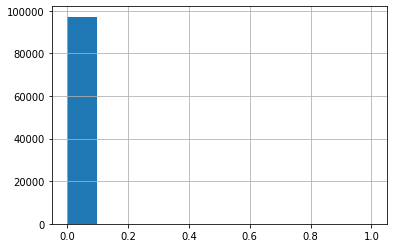

In [13]:
intrusion.Class.hist()
plt.show()

In [14]:
intrusion.Class.value_counts()

0    97278
1       30
Name: Class, dtype: int64

By looking at the data it is clear to see that a class imbalance might be induce by introducing this variables to the model.

# Analysis

As mentioned and explored in the section above we have 39 Numerical variables and 3 categorical ones. For that reason and knowing that we have a class imbalance the ML model for this problem will be simplified by using just a handfull of the noted variables.

## Input Data

### Normalized Variables

In [15]:
numerics = ['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell',
'su_attempted','num_root','num_file_creations','num_shells','num_access_files',
'num_outbound_cmds','is_host_login','is_guest_login','srv_count','serror_rate',
'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']

In [16]:
#Normalize numeric values (at least 1 column, but be consistent with other numeric data)
sub = "_norm"
for i in numerics:
    intrusion[i + sub] = (intrusion[i] - np.mean(intrusion[i]))/np.std(intrusion[i])

### One-hot encode

In [17]:
#Hot encoding protocol type to include the variable in the ML model
for i in intrusion.protocol_type.unique():
    intrusion.loc[:,i] = (intrusion.loc[:, "protocol_type"] == i).astype(int)

In [18]:
#Hot encoding service to include the variable in the ML model
for i in intrusion.service.unique():
    intrusion.loc[:,i] = (intrusion.loc[:, "service"] == i).astype(int)

In [19]:
#Hot encoding flag to include the variable in the ML model
for i in intrusion.flag.unique():
    intrusion.loc[:,i] = (intrusion.loc[:, "flag"] == i).astype(int)

## Split Data Set

In [20]:
#Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [21]:
# #Attributes
# normalized_variables = ['duration_norm','src_bytes_norm','dst_bytes_norm','land_norm','urgent_norm',
# 'hot_norm','num_failed_logins_norm','logged_in_norm','num_compromised_norm','root_shell_norm','su_attempted_norm',
# 'num_root_norm','num_file_creations_norm','num_shells_norm','num_access_files_norm',
# 'is_guest_login_norm','srv_count_norm','serror_rate_norm','srv_serror_rate_norm','rerror_rate_norm',
# 'srv_rerror_rate_norm','same_srv_rate_norm','diff_srv_rate_norm','srv_diff_host_rate_norm','dst_host_count_norm','dst_host_srv_count_norm',
# 'dst_host_same_srv_rate_norm','dst_host_diff_srv_rate_norm','dst_host_same_src_port_rate_norm','dst_host_srv_diff_host_rate_norm',
# 'dst_host_serror_rate_norm','dst_host_srv_serror_rate_norm','dst_host_rerror_rate_norm','dst_host_srv_rerror_rate_norm']

In [22]:
#Attributes
normalized = ['duration_norm','src_bytes_norm','dst_bytes_norm','urgent_norm','num_access_files_norm','num_root_norm','num_file_creations_norm']
others = ['land','is_guest_login','same_srv_rate','diff_srv_rate','srv_serror_rate','srv_rerror_rate'] #'is_host_login' just have one option [0]

In [23]:
columns = ["service", "protocol_type"]
#columns = ["flag", "service", "protocol_type"] #Flag is not included as a expert subject matter would be needed to verify the use of that variable

first_list = []
for i in columns:
    x = intrusion[i].unique()
    y = x.tolist()
    first_list.append(y)
    
one_hot = []    
for sublist in first_list:
    for item in sublist:
        one_hot.append(item)

In [24]:
one_hot

['http',
 'smtp',
 'finger',
 'domain_u',
 'auth',
 'telnet',
 'ftp',
 'eco_i',
 'ntp_u',
 'ecr_i',
 'other',
 'pop_3',
 'ftp_data',
 'ssh',
 'domain',
 'private',
 'time',
 'shell',
 'IRC',
 'urh_i',
 'X11',
 'urp_i',
 'tftp_u',
 'tim_i',
 'red_i',
 'tcp',
 'udp',
 'icmp']

In [25]:
## Code to verify no NaN or columns with only one value were included
# for i in normalized:
#     x = intrusion[i].unique()
#     print (x)

Variables with only one value were not included since there is no benefit on adding that to the the ML model.

In [26]:
#variable =  others + one_hot
#variable = normalized + one_hot
variable = normalized + others + one_hot

In [27]:
intrusion['New_Class'] = intrusion['Class'].replace({0:1, 1:0}) #as an optional variable

In [28]:
#Split the data
variables = intrusion[variable]
label = intrusion["Class"]
X_train, X_test, y_train, y_test = train_test_split(variables, label, test_size=0.30, random_state=42)

In [29]:
variables.shape

(97308, 41)

In [30]:
intrusion.Class.value_counts()

0    97278
1       30
Name: Class, dtype: int64

## Train & Test Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

In [32]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors
#nbc = GaussianNB() #Naive Bayes
#dtc = DecisionTreeClassifier() #DecisionTree
rfc = RandomForestClassifier(n_estimators=estimators, min_samples_split=mss) #Random Forest

#List for Classifiers and Names
#header = ["K_Nearest_Neighbors","Naive_Bayes","Decision_Tree","Random_Forest"]
header = ["K_Nearest_Neighbors","Random_Forest"]
V = [knn,rfc]

## Evaluate Model Performance

In [33]:
from sklearn.metrics import *
def ROM_plots(T,y):
    # ROC analysis
    LW = 2.0 # line width for plots
    LL = "lower right" # legend location
    LC = 'orange' # Line Color
    fpr, tpr, th = roc_curve(T, y) # False Positive Rate, True Posisive Rate, probability thresholds
    AUC = auc(fpr, tpr)
    print ("\nTP rates:", np.round(tpr, 2))
    print ("\nFP rates:", np.round(fpr, 2))
    print ("\nProbability thresholds:", np.round(th, 2))
    plt.figure()
    plt.title('Receiver Operating Characteristic curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPT')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
    plt.legend(loc=LL)
    plt.show()
    print ("\nAUC score (using auc function):", np.round(AUC, 2))
    print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, y), 2), "\n")

In [34]:
#Function to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print("\n\n#############\Classifier: #############\n", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        ROM_plots(T,y)
    
    names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
    list_of_values = [accuracy_rate, error_rate, precision, recall, f1_score]
    colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
    
    #Plots of each of the Performance Values for each of the Classifiers in this analysis
    for i in range(len(names)):
        plt.bar(header, list_of_values[i], color=colors[i])
        plt.xticks(rotation=45)
        plt.title(names[i])
        plt.ylabel("Score")
        plt.show()



#############\Classifier: #############
 K_Nearest_Neighbors


Confusion matrix:
 [[   10     1]
 [    1 29181]]

TP, TN, FP, FN: 29181 , 10 , 1 , 1

Accuracy: 0.9999 ,Error Rate: 0.0001 ,Precision: 1.0 ,Recall: 1.0 ,F1 Score: 1.0

TP rates: [0. 0. 0. 0. 0. 1.]

FP rates: [0.   0.36 0.91 0.91 0.91 1.  ]

Probability thresholds: [2.  1.  0.8 0.4 0.2 0. ]


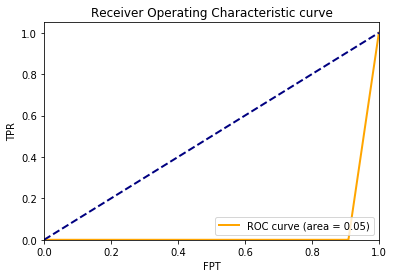


AUC score (using auc function): 0.05

AUC score (using roc_auc_score function): 0.05 



#############\Classifier: #############
 Random_Forest


Confusion matrix:
 [[    8     3]
 [    1 29181]]

TP, TN, FP, FN: 29181 , 8 , 3 , 1

Accuracy: 0.9999 ,Error Rate: 0.0001 ,Precision: 0.9999 ,Recall: 1.0 ,F1 Score: 0.9999

TP rates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

FP rates: [0.   0.09 0.18 0.36 0.64 0.64 0.73 0.91 0.91 0.91 1.  ]

Probability thresholds: [2.   1.   0.9  0.8  0.7  0.6  0.52 0.4  0.2  0.1  0.  ]


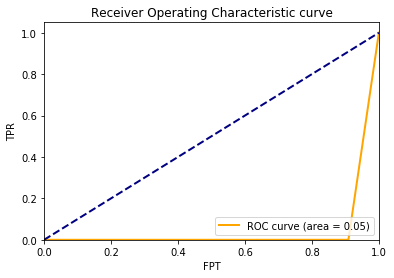


AUC score (using auc function): 0.05

AUC score (using roc_auc_score function): 0.05 



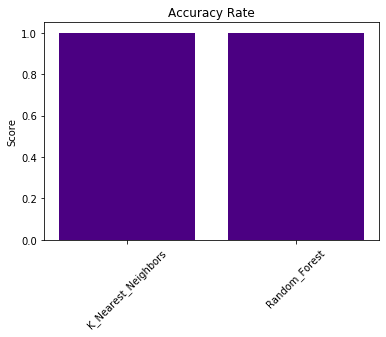

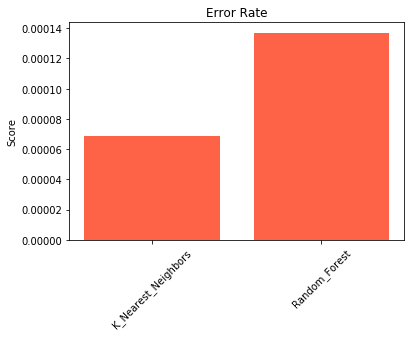

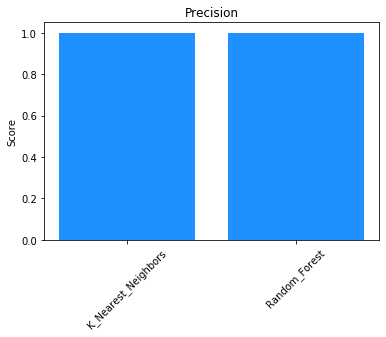

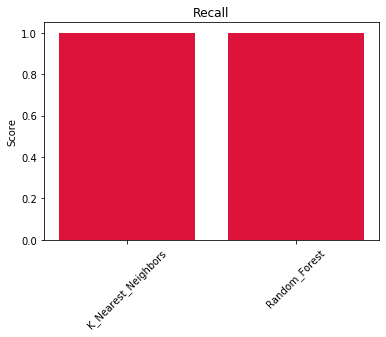

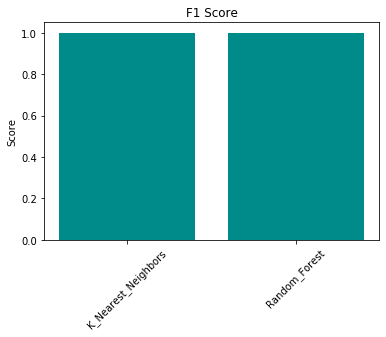

In [35]:
#Running and obtaining performance values from the Models listed above
classifier_performance(V, header, X_train, X_test, y_train, y_test)

The results are too good to be true, and the main reason for that is the class imbalance that we have for the variable that we are trying to predict `Class`. And given that most of the cases regarless of the other variables the values are positives.

Looking at another performance indicator as the ROC and AUC it is possible to notice that the actual performance of the ML Model is not great.

# Class Imbalance

In [36]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [37]:
sm = SMOTE(random_state=42)

In [38]:
variables_res, label_res = sm.fit_resample(variables, label)

In [39]:
label_res.value_counts()

1    97278
0    97278
Name: Class, dtype: int64

It is possible to see that the two options 1 (BAD) and 0 (NORMAL) are now the same size.

In [40]:
variables_res.shape

(194556, 41)

The size of the dataset now is double.

In [41]:
#Split the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(variables_res, label_res, test_size=0.30, random_state=42)



#############\Classifier: #############
 K_Nearest_Neighbors


Confusion matrix:
 [[   11     0]
 [    5 29177]]

TP, TN, FP, FN: 29177 , 11 , 0 , 5

Accuracy: 0.9998 ,Error Rate: 0.0002 ,Precision: 1.0 ,Recall: 0.9998 ,F1 Score: 0.9999

TP rates: [0. 0. 0. 0. 1.]

FP rates: [0. 1. 1. 1. 1.]

Probability thresholds: [2.  1.  0.8 0.2 0. ]


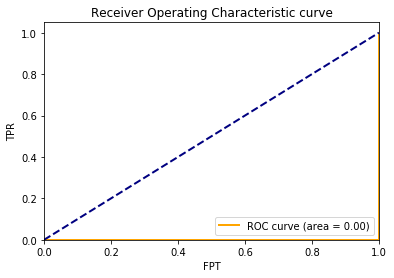


AUC score (using auc function): 0.0

AUC score (using roc_auc_score function): 0.0 



#############\Classifier: #############
 Random_Forest


Confusion matrix:
 [[   11     0]
 [    0 29182]]

TP, TN, FP, FN: 29182 , 11 , 0 , 0

Accuracy: 1.0 ,Error Rate: 0.0 ,Precision: 1.0 ,Recall: 1.0 ,F1 Score: 1.0

TP rates: [0. 0. 0. 0. 0. 0. 0. 1.]

FP rates: [0.   0.91 1.   1.   1.   1.   1.   1.  ]

Probability thresholds: [2.  1.  0.8 0.4 0.3 0.2 0.1 0. ]


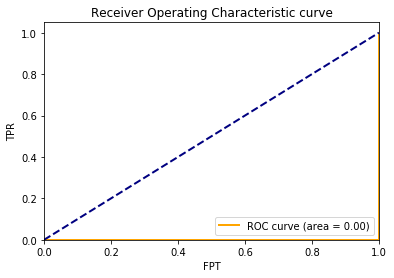


AUC score (using auc function): 0.0

AUC score (using roc_auc_score function): 0.0 



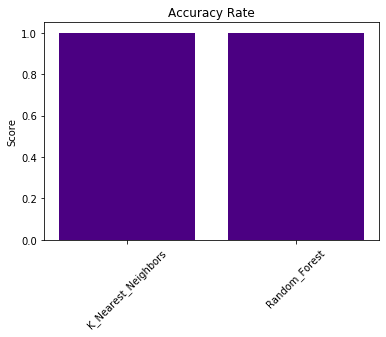

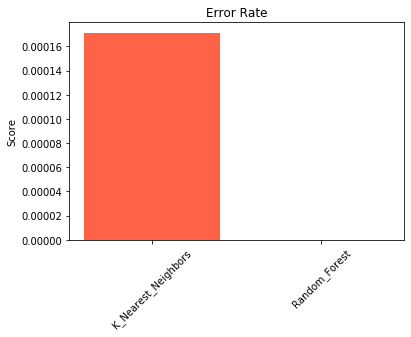

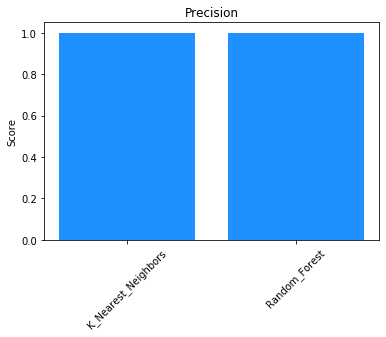

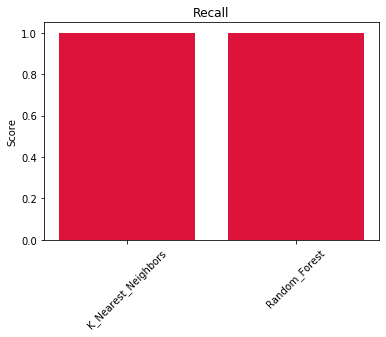

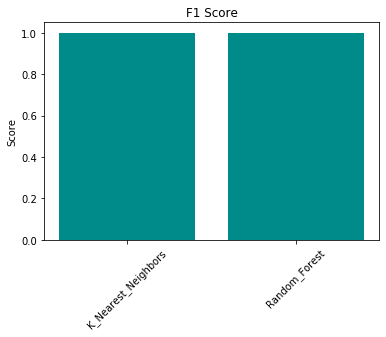

In [42]:
classifier_performance(V, header, X_train_res, X_test, y_train_res, y_test)

# Summary/conclusions:

- From the very beginning it was possible to see that there is class imbalance in this data set: 

| Good connection | 0 | 97278 |
| --- | --- | --- |
| Bad connection | 1 | 30


- After the re-sampling was done the model still got to very incredible performance values, that are an indication of another possible issue happining.

- It is possible to see that work is needed for this ML model to be of use, there are several indications of an issue with the model (if something is too good to be true, most likely it is not) as:

    - *The performance values are closed to 1 and error close to 0, indicating that the model predicts almost 100% the `Class` variable, which is too good to be true.*
    - *The ROC and AUC indicates an issue with the model that had be deal with.*
    - *One possibility is the leakage of one variable (or more) getting us information that is not really available prior to knowing if there is a treat or not (good or bad connection).*
   
   
- One step could be to get in contact with a subject expert matter to explore the variables get an inside of which ones are available prior to knowing if there is good or bad connection, and information on what variables might be more important to detect this anomaly.

- After multiple combination of variables it was seen that the best option for a better ROC & AUC was a simple model with few variables, more on this has to be explored to choose the optimal combination of variables.